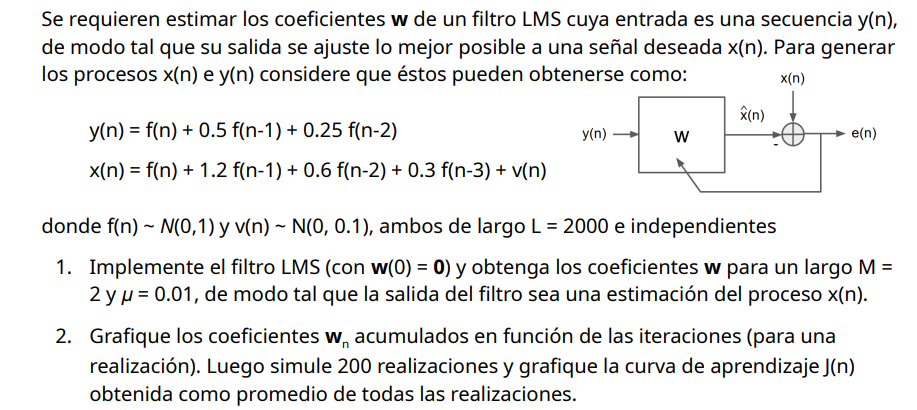

In [168]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sp

In [169]:
L = 2000
M = 2
mu = 0.01
R = 200 

In [170]:
f = np.random.normal(loc = 0, scale = 1, size = (R, L))
v = np.random.normal(loc = 0, scale = np.sqrt(0.1), size = (R, L))

In [171]:
y = sp.lfilter([1, 0.5, 0.25], 1, f, axis = 1)
x = sp.lfilter([1, 1.2, 0.6, 0.3], 1, f, axis = 1) + v

In [172]:
w = np.zeros((R, M, L)) #Valores iniciales de mi filtro
#Tengo 2 filas y 2000 columnas. Cada columna es una aproximación nueva de mi filtro
e = np.zeros((R, L))


In [ ]:
for r in range(R):
    for i in range(M - 1, L - 1):
        w_act = w[r, :, i]
        y_vector = np.flip(y[r, (i - M + 1):i + 1])
        e[r, i] = x[r, i] - np.dot(w_act, y_vector)
        w[r, :, i + 1] = w_act + mu * e[r, i]*y_vector

#que lo parió

'\nfor i in range(M - 1, L - 1):\n        w_act0 = w[r, 0, i]\n        w_act1 = w[r, 1, i]\n        #y_vector = y[0 + i: i + M] No está bien orientado, el valor más reciente tiene que ser y_vector[0]\n        y_vector = np.flip(y[i - M : i]) #esto lo orienta bien\n        y_act = y[r, i]\n        y_ant = y[r, i - 1]\n        e[r, i] = x[r, i] - (w_act0 * y_act + w_act1 * y_ant)\n        w[r, 0, i + 1] = w_act0 + mu * e[r, i] * y_act\n        w[r, 1, i + 1] = w_act1 + mu * e[r, i] * y_ant\n\n'

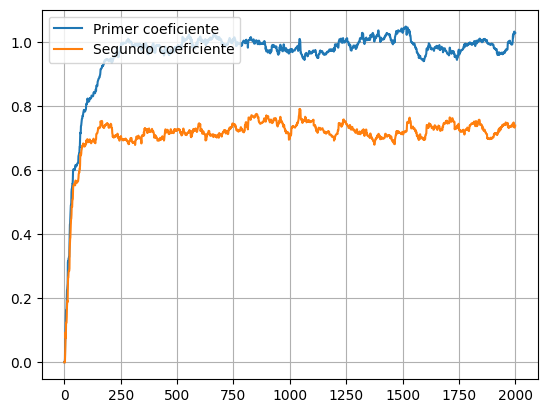

In [177]:
k = np.arange(L)

plt.plot(k, w[0, 0, :], label = 'Primer coeficiente')
plt.plot(k, w[0, 1, :], label = 'Segundo coeficiente')

plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

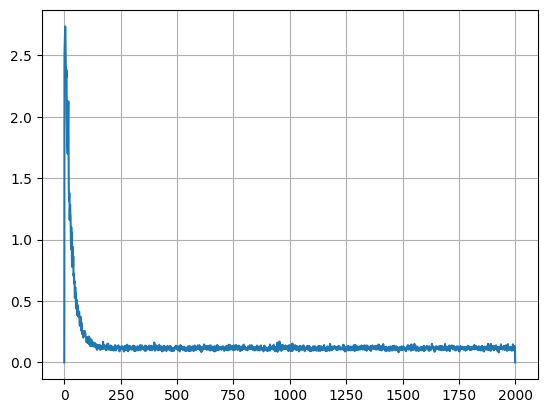

In [148]:
J = e**2
J = np.mean(J, axis = 0)

plt.plot(k, J)

plt.grid(True)
plt.show()

### Actividad 3

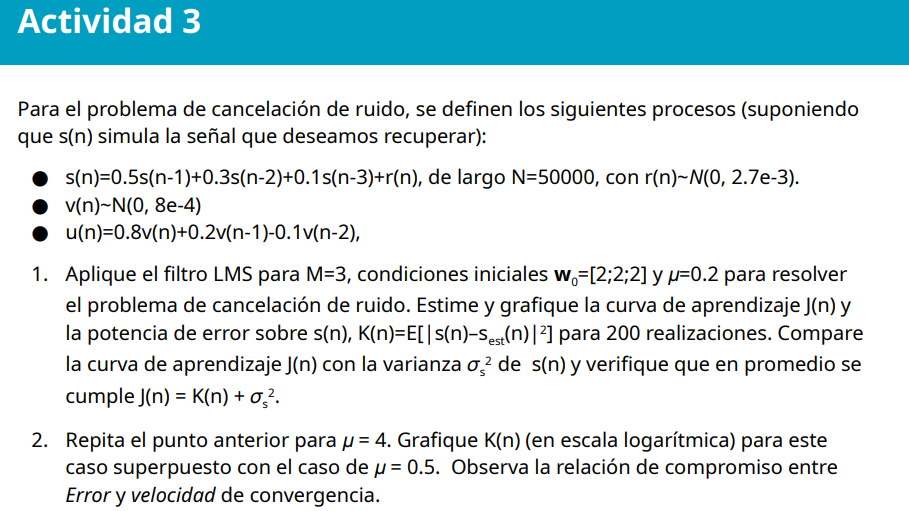

In [149]:
N = 5000
R = 200
M = 3
mu = 0.2

In [150]:
r = np.random.normal(loc = 0, scale = np.sqrt(2.7e-3), size = (N))

v = np.random.normal(loc = 0, scale = np.sqrt(8e-4), size = (N))

s = sp.lfilter(1, [1, -0.5, -0.3, -0.1], r)
u = sp.lfilter([0.8, 0.2, -0.1], 1, v)


In [ ]:
w = 2 * np.ones((M, N)) #Valores iniciales de mi filtro
#Tengo 2 filas y 2000 columnas. Cada columna es una aproximación nueva de mi filtro
e = np.zeros(N)

In [ ]:
for i in range(M- 1, N - 1):
    w_act = w[:, i]
    u_vect = np.flip(u[i-2:i])
    e[i] = (s[i] + v[i]) - np.dot(w)
    
